In [63]:
dataset <- read.csv("abalone.data")
dataset$type <- as.factor(ifelse(sample(nrow(dataset)) < 0.8*nrow(dataset), "Train", "Test"))
dataset[1:10,]

sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,type
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Train
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Train
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Train
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Train
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Test
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,Test
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,Train
F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,Train
M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,Train
F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,Test


[1] "Cor=0.75, MSE=4.40"


[1] "Cor=0.77, MSE=4.17"


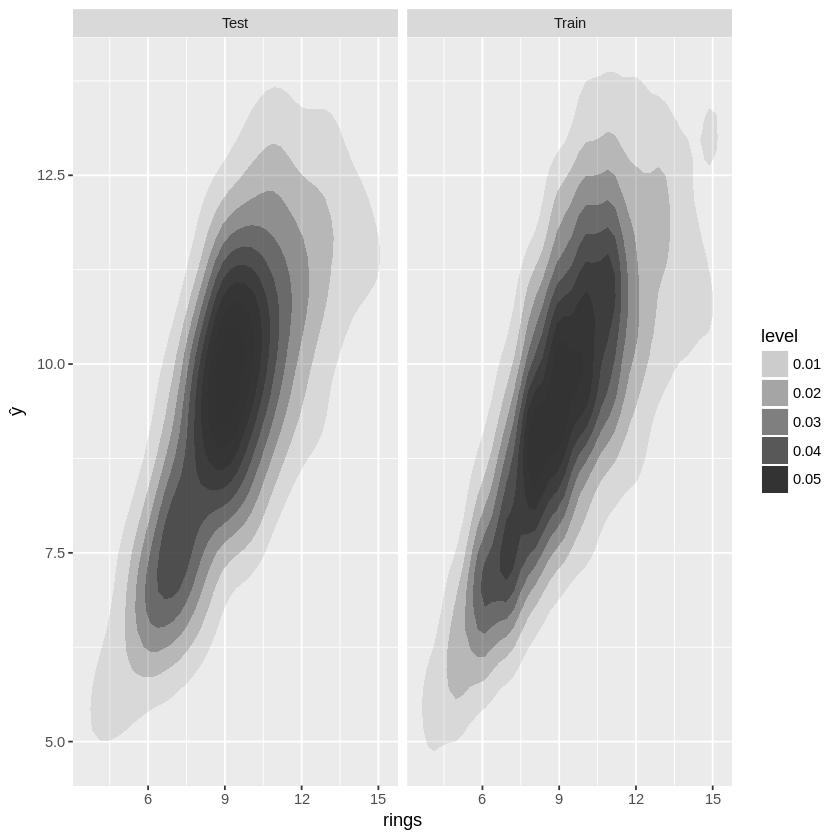

[1] "Cor=0.77, MSE=4.21"


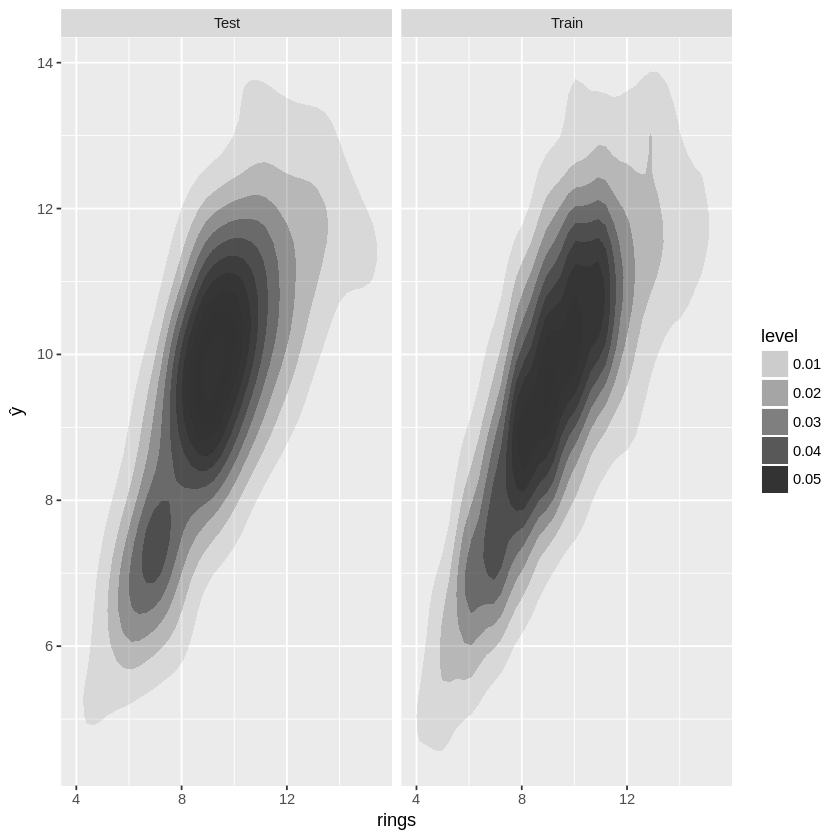

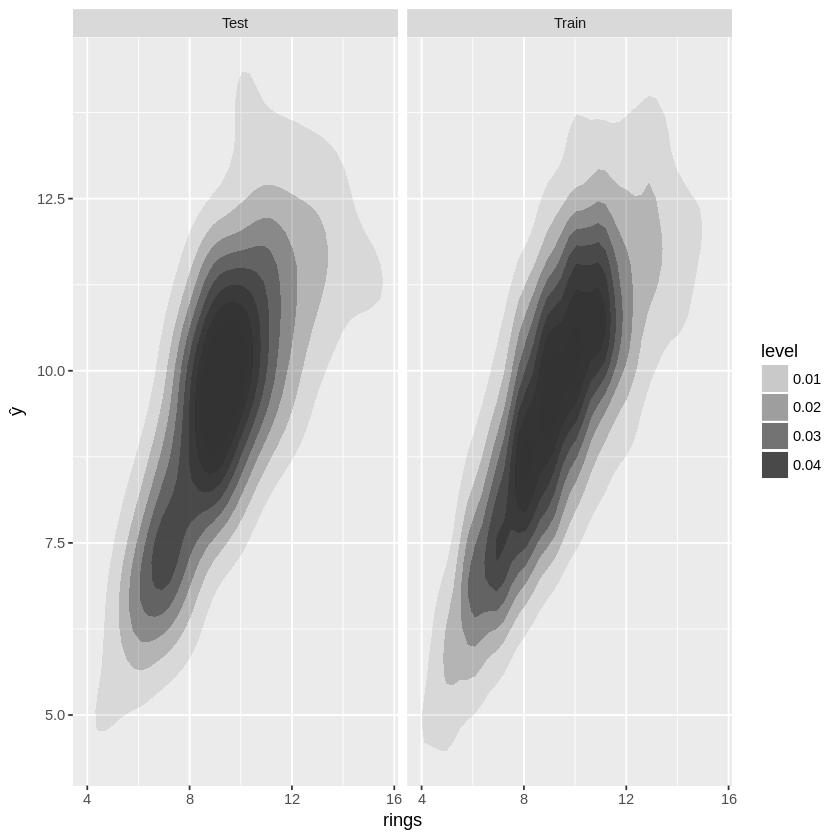

In [89]:
library(ggplot2)

MSE <- function(prediction, y){
	return(sum((prediction - y)**2) / (length(y)))
}

test.formula <- function(dataset, formula) {
    regression <- lm(
        formula = formula,
        data = dataset[dataset$type == "Train",])

    #print(summary(regression))
    dataset$ŷ <- predict(regression, dataset)

    test.dataset <- dataset[dataset$type == "Test",]
    print(sprintf(
        "Cor=%.2f, MSE=%.2f",
        cor(test.dataset$rings, test.dataset$ŷ),
        MSE(test.dataset$rings, test.dataset$ŷ)))
    
    p1 <- ggplot(data=dataset, aes(x=rings, y=ŷ))
    p1 <- p1 + facet_wrap(~ type)
    p1 <- p1 + stat_density2d(aes(alpha=..level..), geom="polygon")
    #p1 <- p1 + ggtitle(sprintf("Correlation = %.2f", cor(train.dataset$rings, train.dataset$ŷ)))     
    p1
}

#all_vars <- 
test.formula(dataset, rings ~ sex + length + diameter + height + whole_weight + shucked_weight + viscera_weight + shell_weight)
test.formula(dataset, rings ~ (sex + length + diameter + height + whole_weight + shucked_weight + viscera_weight + shell_weight)^2)

test.formula(dataset, rings ~ (sex + length + diameter + height + whole_weight + shucked_weight + viscera_weight + shell_weight)^3)


#z <- sample(1:nrow(dataset))
#sample(dataset)
#?sample